<img src="../images/blackfin_logo_black.png" style="float: left; margin: 20px; height: 55px">

# Ames Housing Data and Kaggle Challenge
# Notebook 1: Exploratory Data Analysis

## Executive Summary

## Problem Statement
Home owners are facing issues valuing their property due to the recent volatility of the housing market in the US. <br>Blackfin aims to build a model that will assist home owners and buyers with getting the best price based on the latest market situation. 

## Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
# import datasets
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# shape of datasets
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [5]:
# convert column names to lower case and replace any spacings and special characters with underscores(_)
def rename_cols(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
    return df

In [6]:
# apply function above to train dataset
train = rename_cols(train)

In [7]:
train.dtypes.unique() # checking for data types

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
# mask categorical and numberical features
cat_features = [col for col in train.select_dtypes(include=['object']).columns]
num_features = [col for col in train.select_dtypes(include=['int64', 'float64']).columns]

%store cat_features

Stored 'cat_features' (list)


In [10]:
print(cat_features, num_features)

['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type'] ['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_

In [11]:
print(f'No. of categorical features: {len(cat_features)}')
print(f'No. of numeric features: {len(num_features)}')

No. of categorical features: 42
No. of numeric features: 39


In [21]:
# function for plotting boxplot of categorical features

def subplot_boxplot(df, list_of_cols,  y_var, figtitle):
    nrows = int(np.ceil(len(list_of_cols)/4)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 4, figsize = (20, 40)) 
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_cols):
        sns.boxplot(data = df, x = y_var, y = column, ax = ax[i], orient = 'h', showmeans = True, meanprops = {'marker': '+', 'markeredgecolor':'black'})
        plt.tight_layout()
        

    for j in range((nrows * 4) - len(list_of_cols)):
        ax[-j-1].set_visible(False) # hide unused plots
        
    plt.suptitle(figtitle, size = 20, y = 1.005)

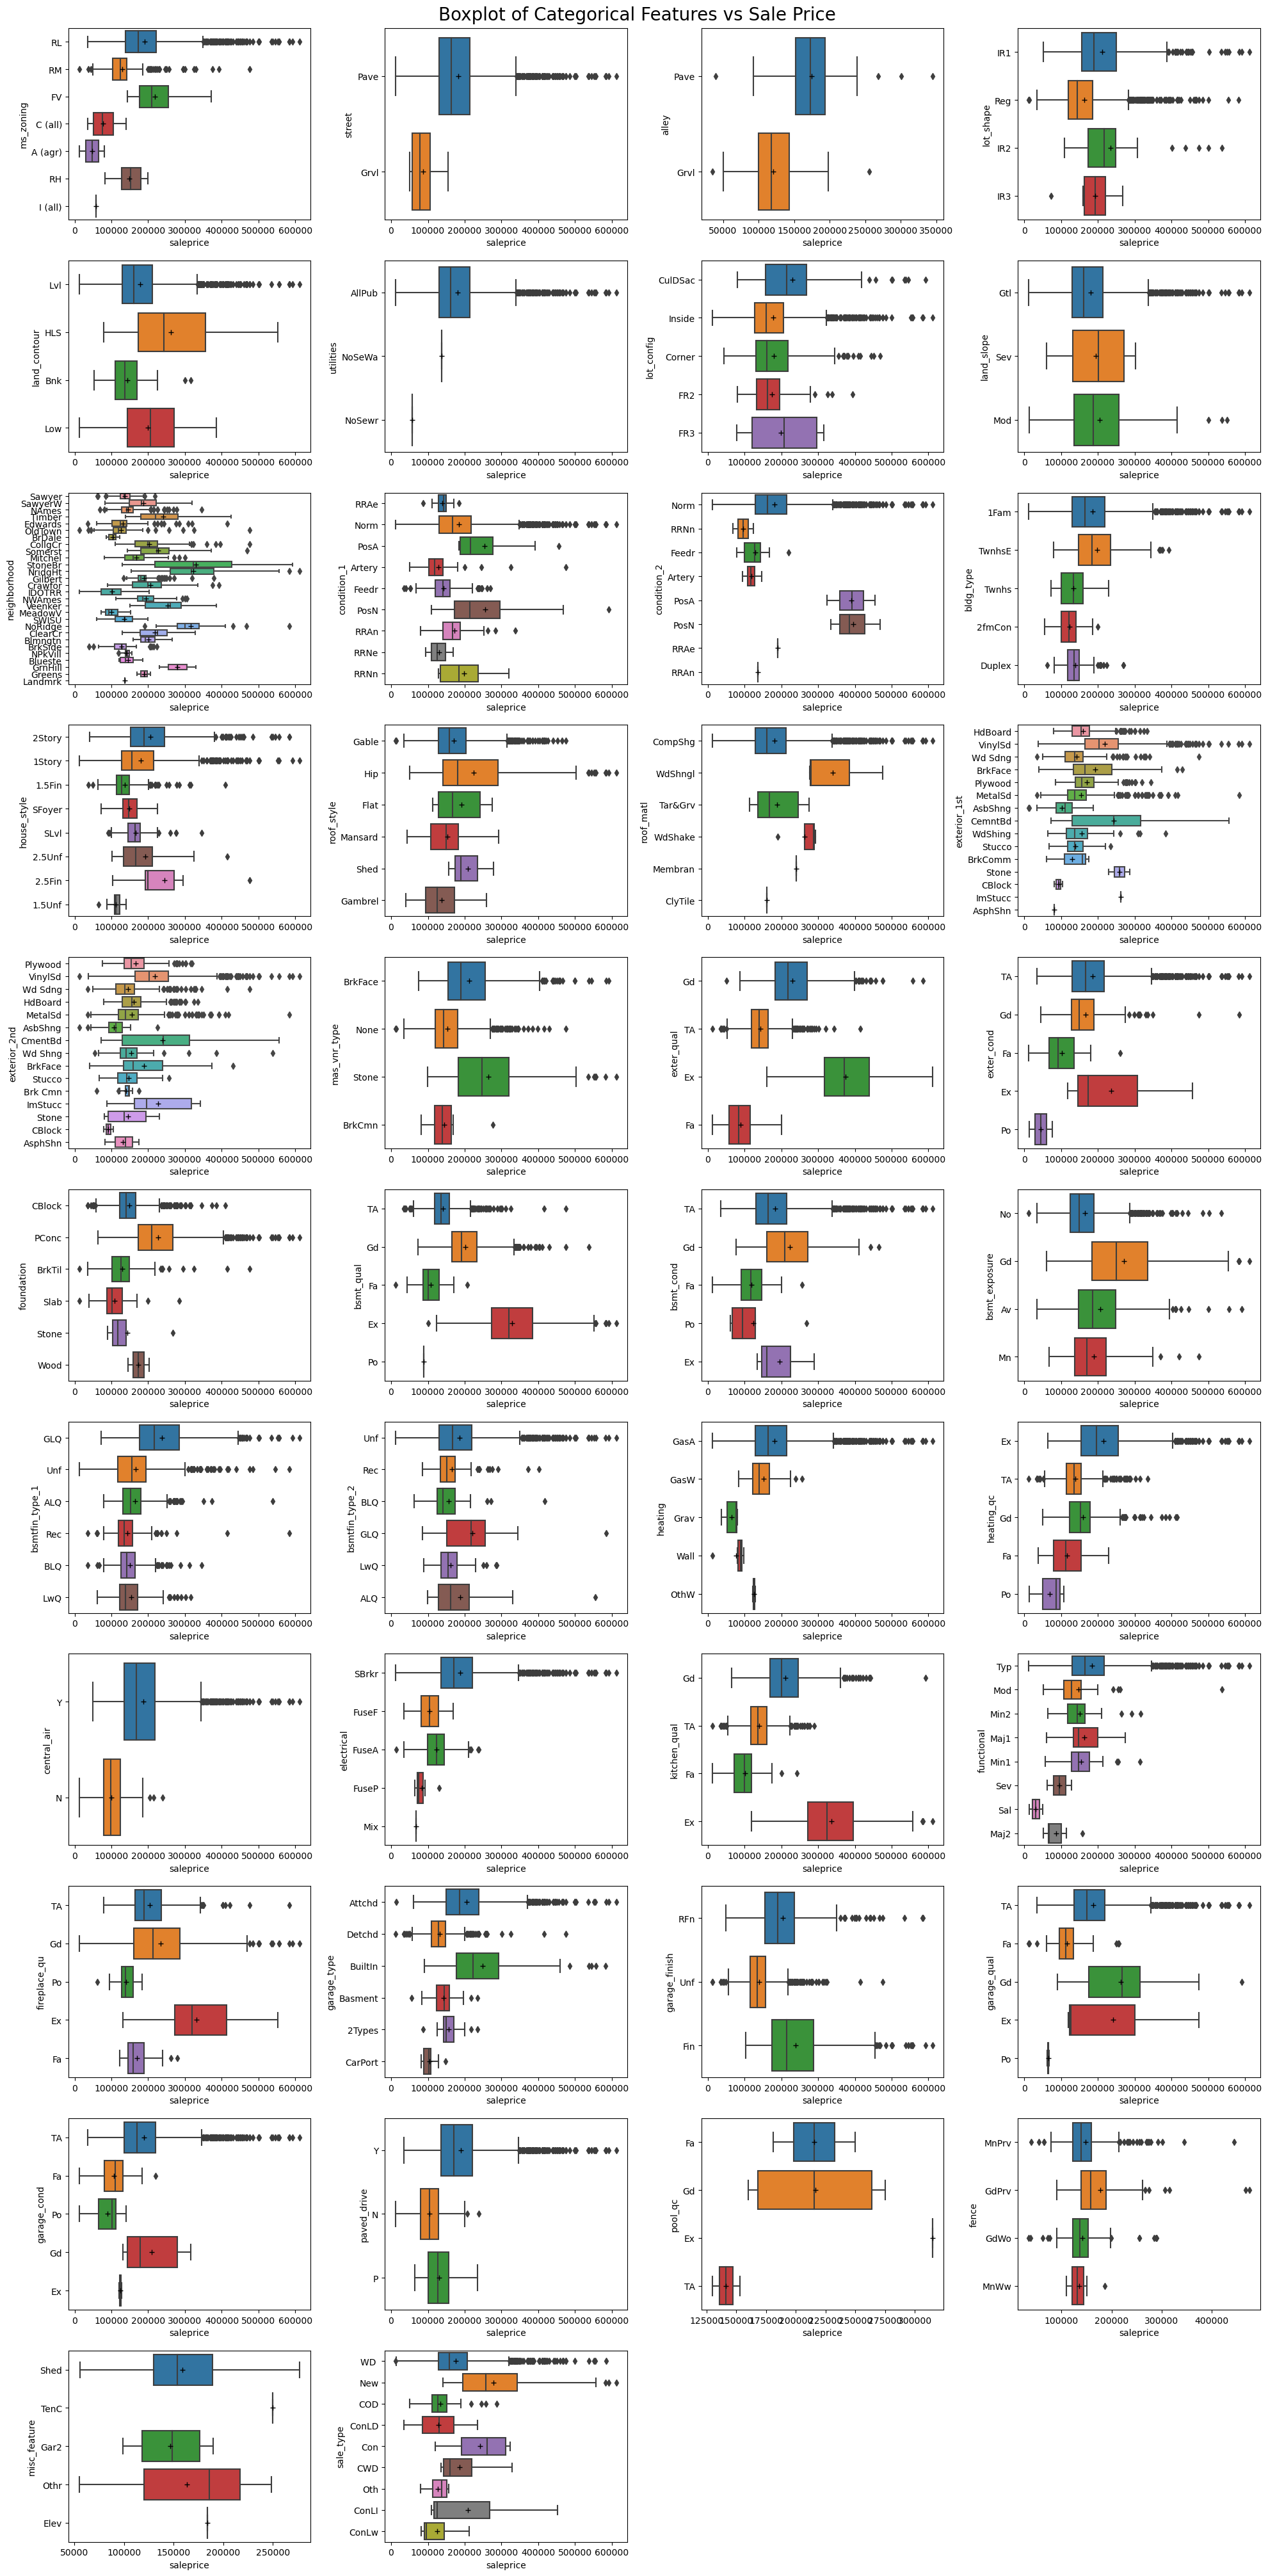

In [22]:
subplot_boxplot(train, cat_features, 'saleprice', 'Boxplot of Categorical Features vs Sale Price')

From the boxplots above, we can observe that 
1. Paved streets/alleys/driveways have a higher mean and median price than gravel streets/alleys/driveways.  
2. Houses with all public utilities available tends to have a higher saleprice. 
3. Houses with central airconditioning have a higher saleprice for all quartiles compared to houses without. 

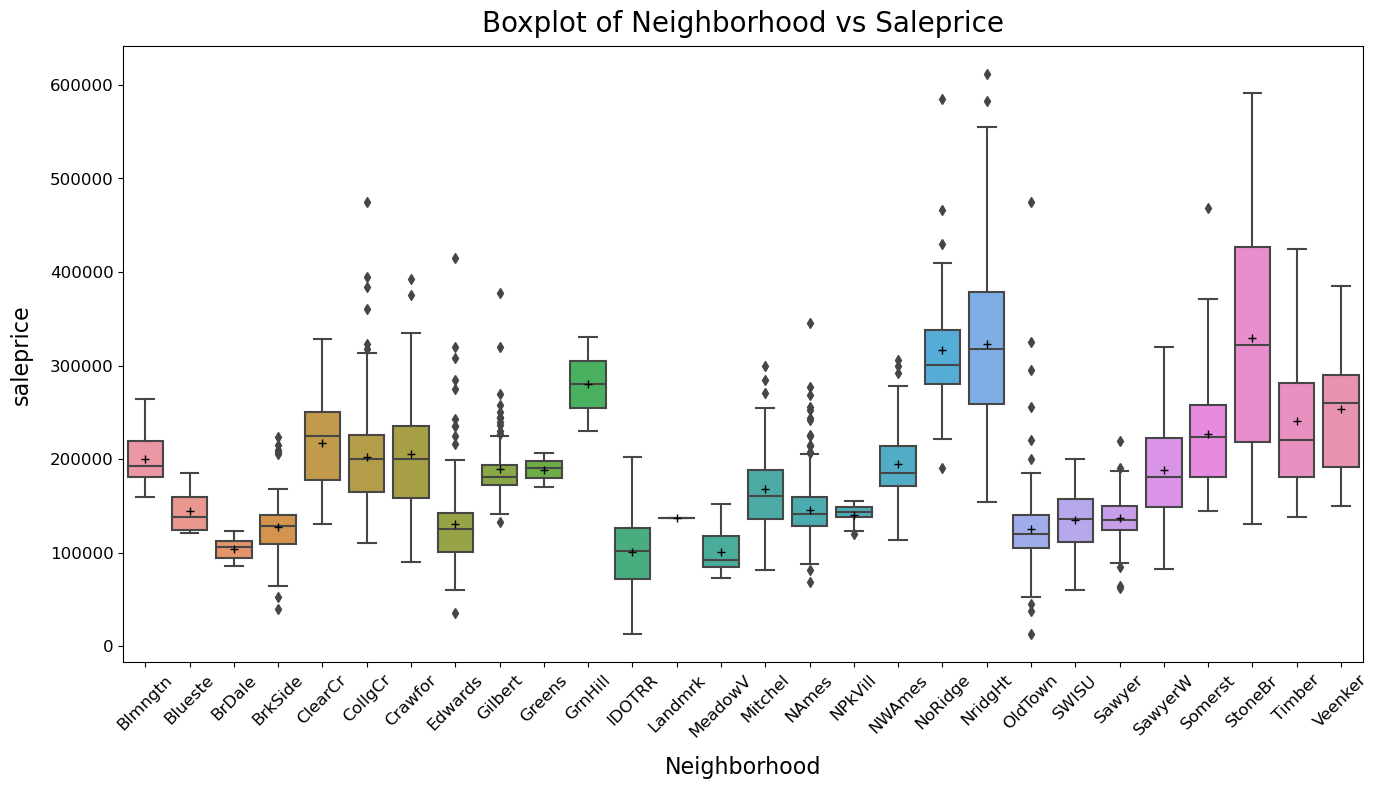

In [14]:
# zooming into neighborhood boxplot
plt.figure(figsize = (16,8))
sns.boxplot(data = train, x = train['neighborhood'].sort_values(), y = 'saleprice', showmeans = True, meanprops = {'marker': '+', 'markeredgecolor':'black'})
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Neighborhood', fontsize = 16, labelpad = 12)
plt.ylabel('saleprice', fontsize = 16,labelpad = 12)
plt.title('Boxplot of Neighborhood vs Saleprice', fontsize = 20, y = 1.01);

From the boxplot above, 
1. We can observe that GrnHill, NoRidge, NridgHt and StoneBr have significantly higher mean and median prices compares to the other neighborhoods.
2. Of the 4 neighbourhoods mentioned above, the lowest sale price of StoneBr was relatively similar to the other neighborhoods. But the lowest sale price of GrnHill, NoRidge and NridgHt were significantly higher than most other neighborhoods. 
3. Some neighborhoods have a large range of saleprices (StoneBr). Quite a number of neighborhoods have quite a small range of saleprices (`Blueste`, `BrDale`, `Greens`, `NPkVill`).

* There is a neighborhood called 'Landmrk' which has been mislabelled. Since only one row has this wrong value, we will ignore this error for now.

In [15]:
# function for plotting strip plots of categorical features
def subplot_strip(df, list_of_cols, y_var, figtitle):
    nrows = int(np.ceil(len(list_of_cols)/4)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 4, figsize = (20, 40)) 
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_cols):
        sns.stripplot(data = df, x = y_var, y = column, ax = ax[i])
        plt.tight_layout()
        
    for j in range((nrows * 4) - len(list_of_cols)):
        ax[-j-1].set_visible(False) # hide unused plots
        
    plt.suptitle(figtitle, size = 18, y = 1.01)

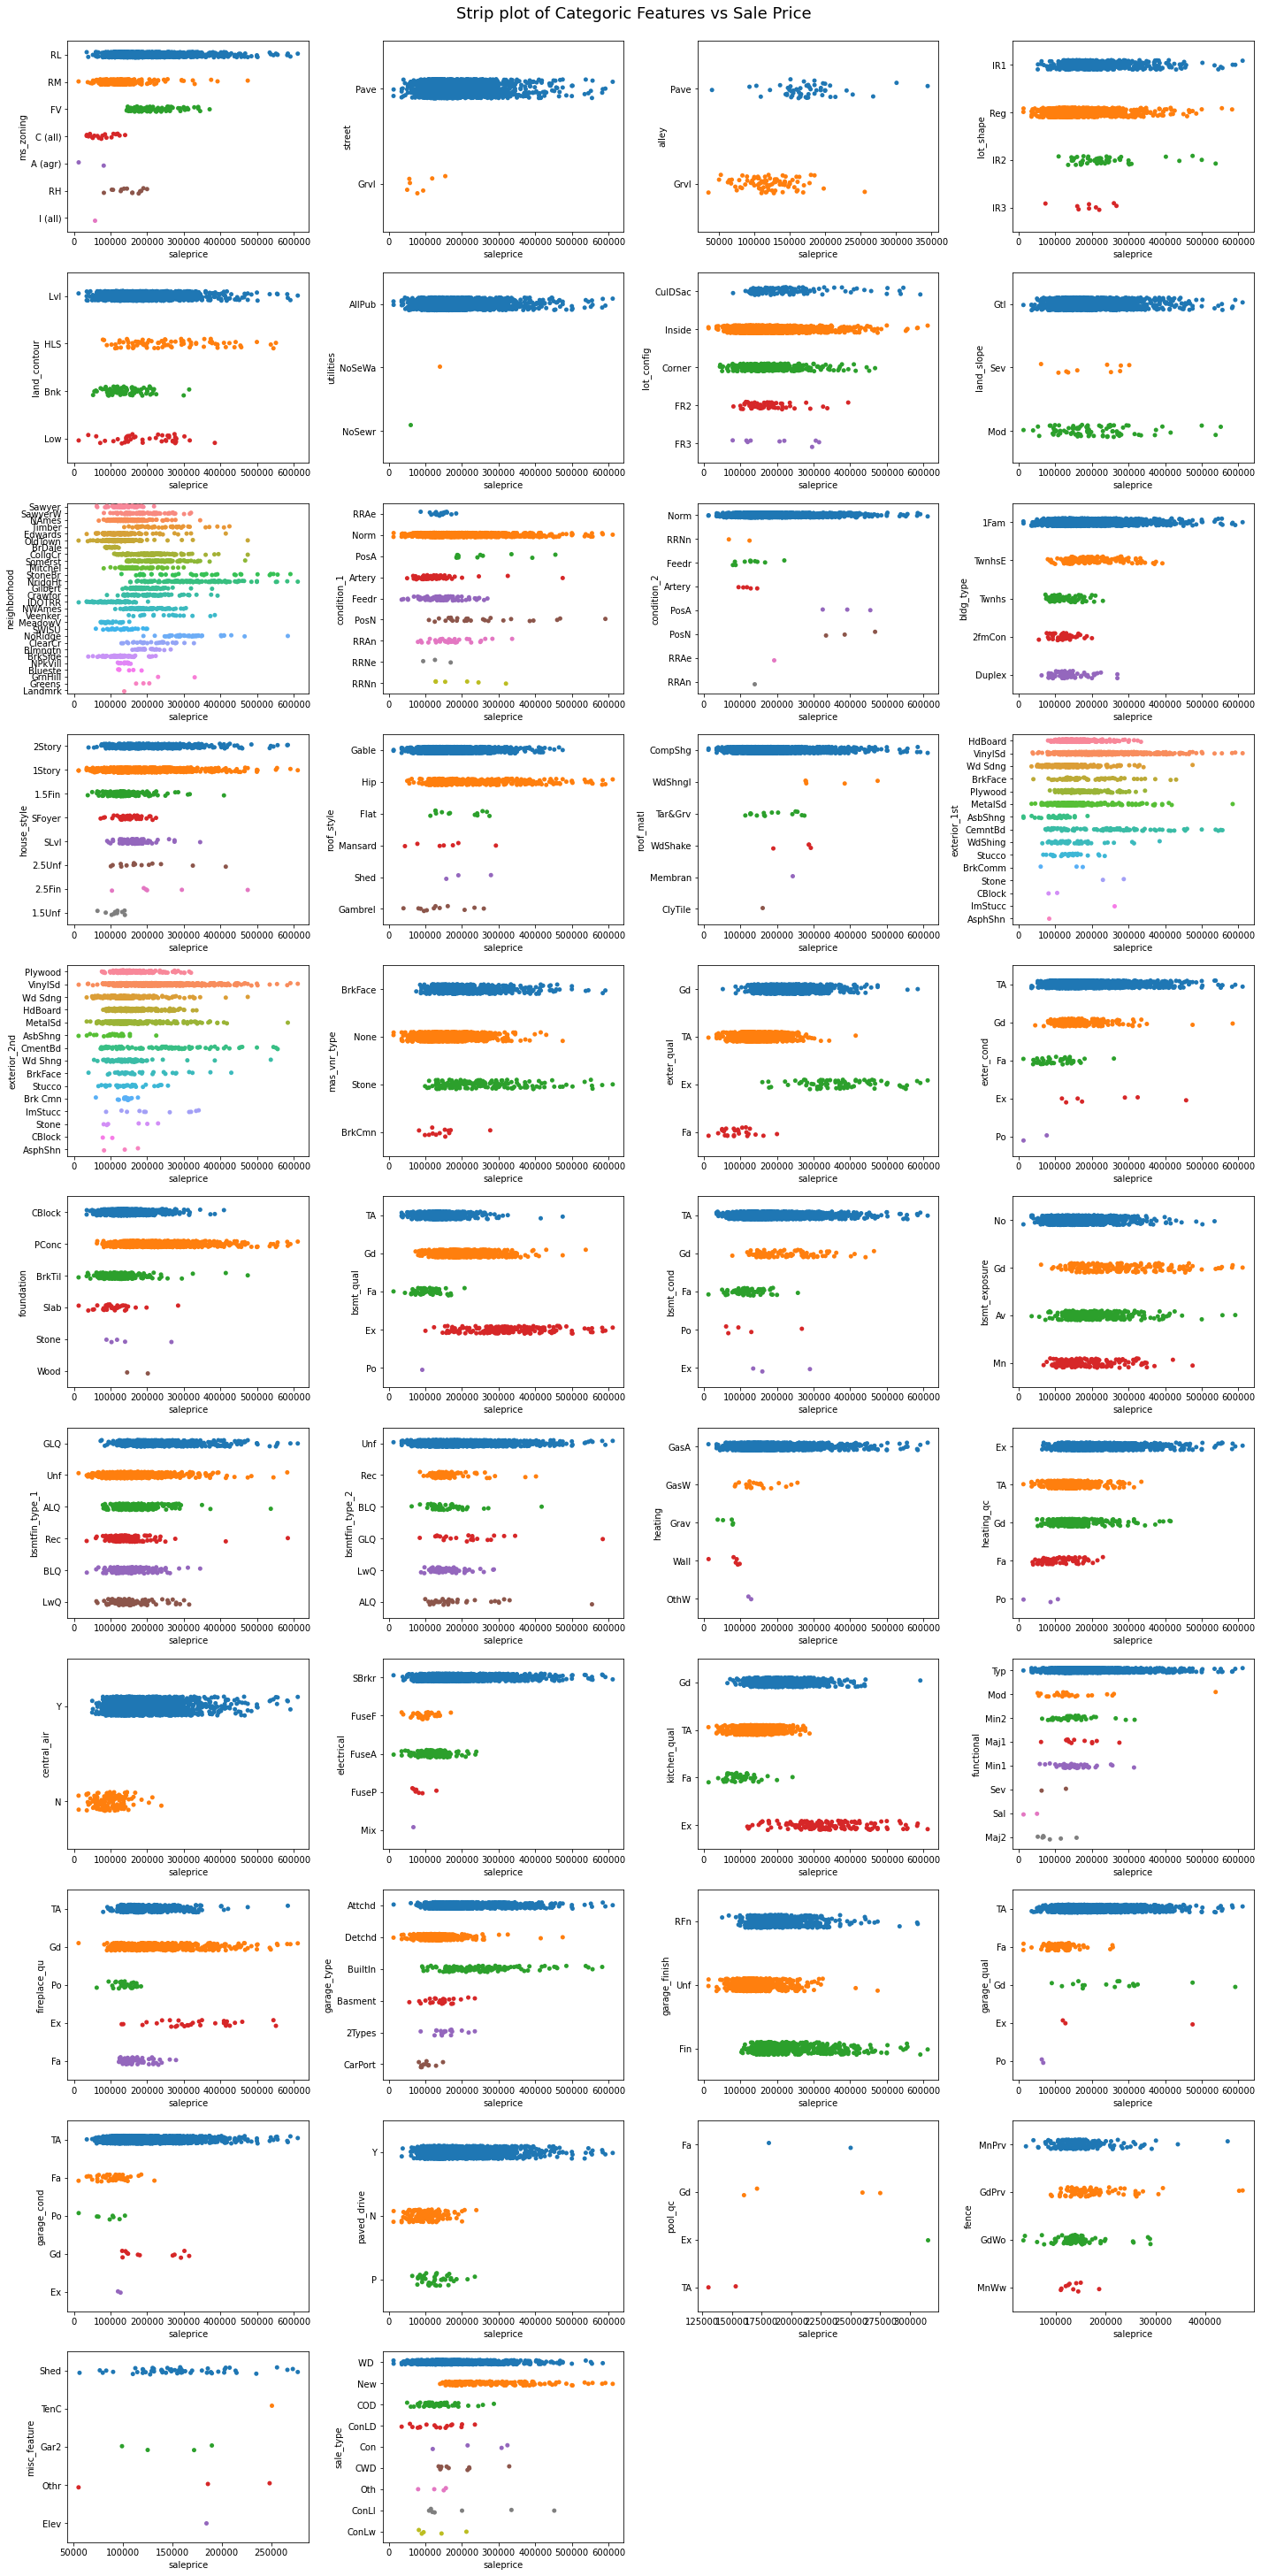

In [16]:
subplot_strip(train, cat_features, 'saleprice', 'Strip plot of Categoric Features vs Sale Price')

From the strip plots above, we can observe the distribution of the features more clearly. Features such as `street` and `utilities` have very little variance. 

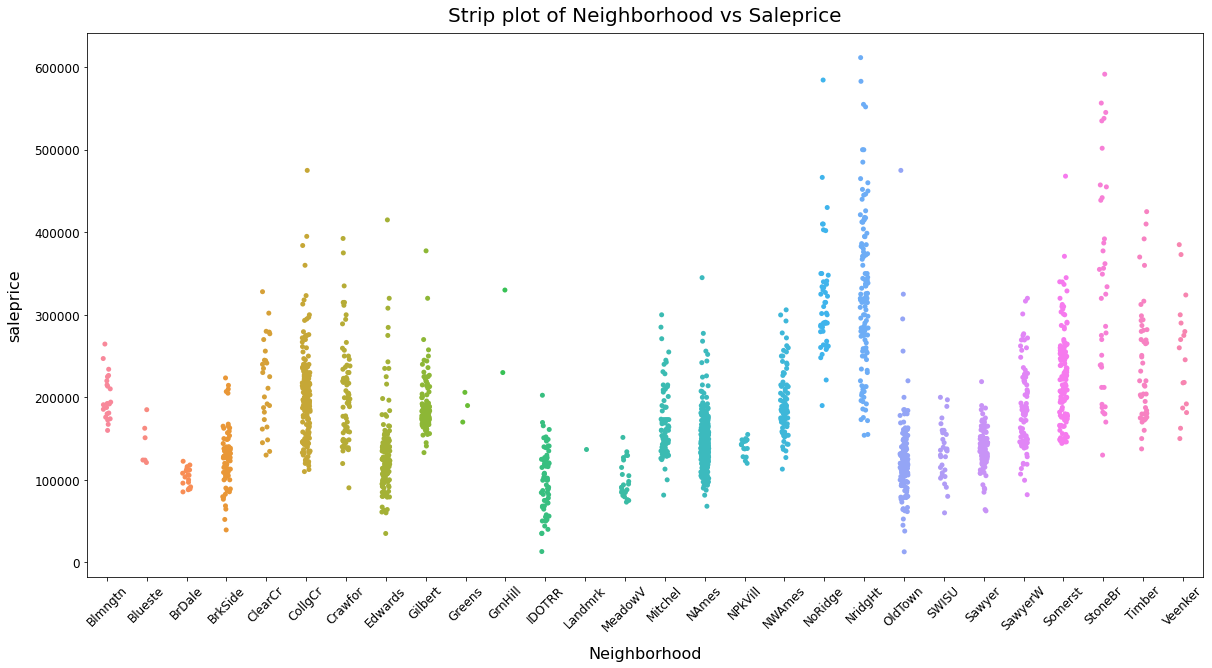

In [17]:
# zooming into neighborhood strip plot
plt.figure(figsize = (20,10))
sns.stripplot(data = train, x = train['neighborhood'].sort_values(), y = 'saleprice')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize= 12)
plt.xlabel('Neighborhood', fontsize = 16, labelpad = 12)
plt.ylabel('saleprice', fontsize = 16,labelpad = 12)
plt.title('Strip plot of Neighborhood vs Saleprice', fontsize = 20, y = 1.01);

By zooming into the strip plot of Neighborhood vs Saleprice, we can observe that there are a few neighborhoods with a very small sample size. <br>Eg. `Blueste`, `BrDale`, `Greens`, `GrnHill`, `NPkVill`. It was also observed in the boxplot that these neighborhoods have a small range of saleprices

In [18]:
# function for plotting scatter plots of numeric features 

def subplot_scatter(df, list_of_cols, y_var, figtitle): 
    nrows = int(np.ceil(len(list_of_cols)/4)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 4, figsize = (16, nrows*2.5)) 
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_cols):
        sns.regplot(data = df, x = column, y = y_var, ax = ax[i], ci = None, color = 'lightsteelblue', line_kws = {'color': 'slateblue'} )
        plt.tight_layout()
        
    for j in range((nrows * 4) - len(list_of_cols)):
        ax[-j-1].set_visible(False) # hide unused plots
        
    plt.suptitle(figtitle, size = 18, y = 1.01)

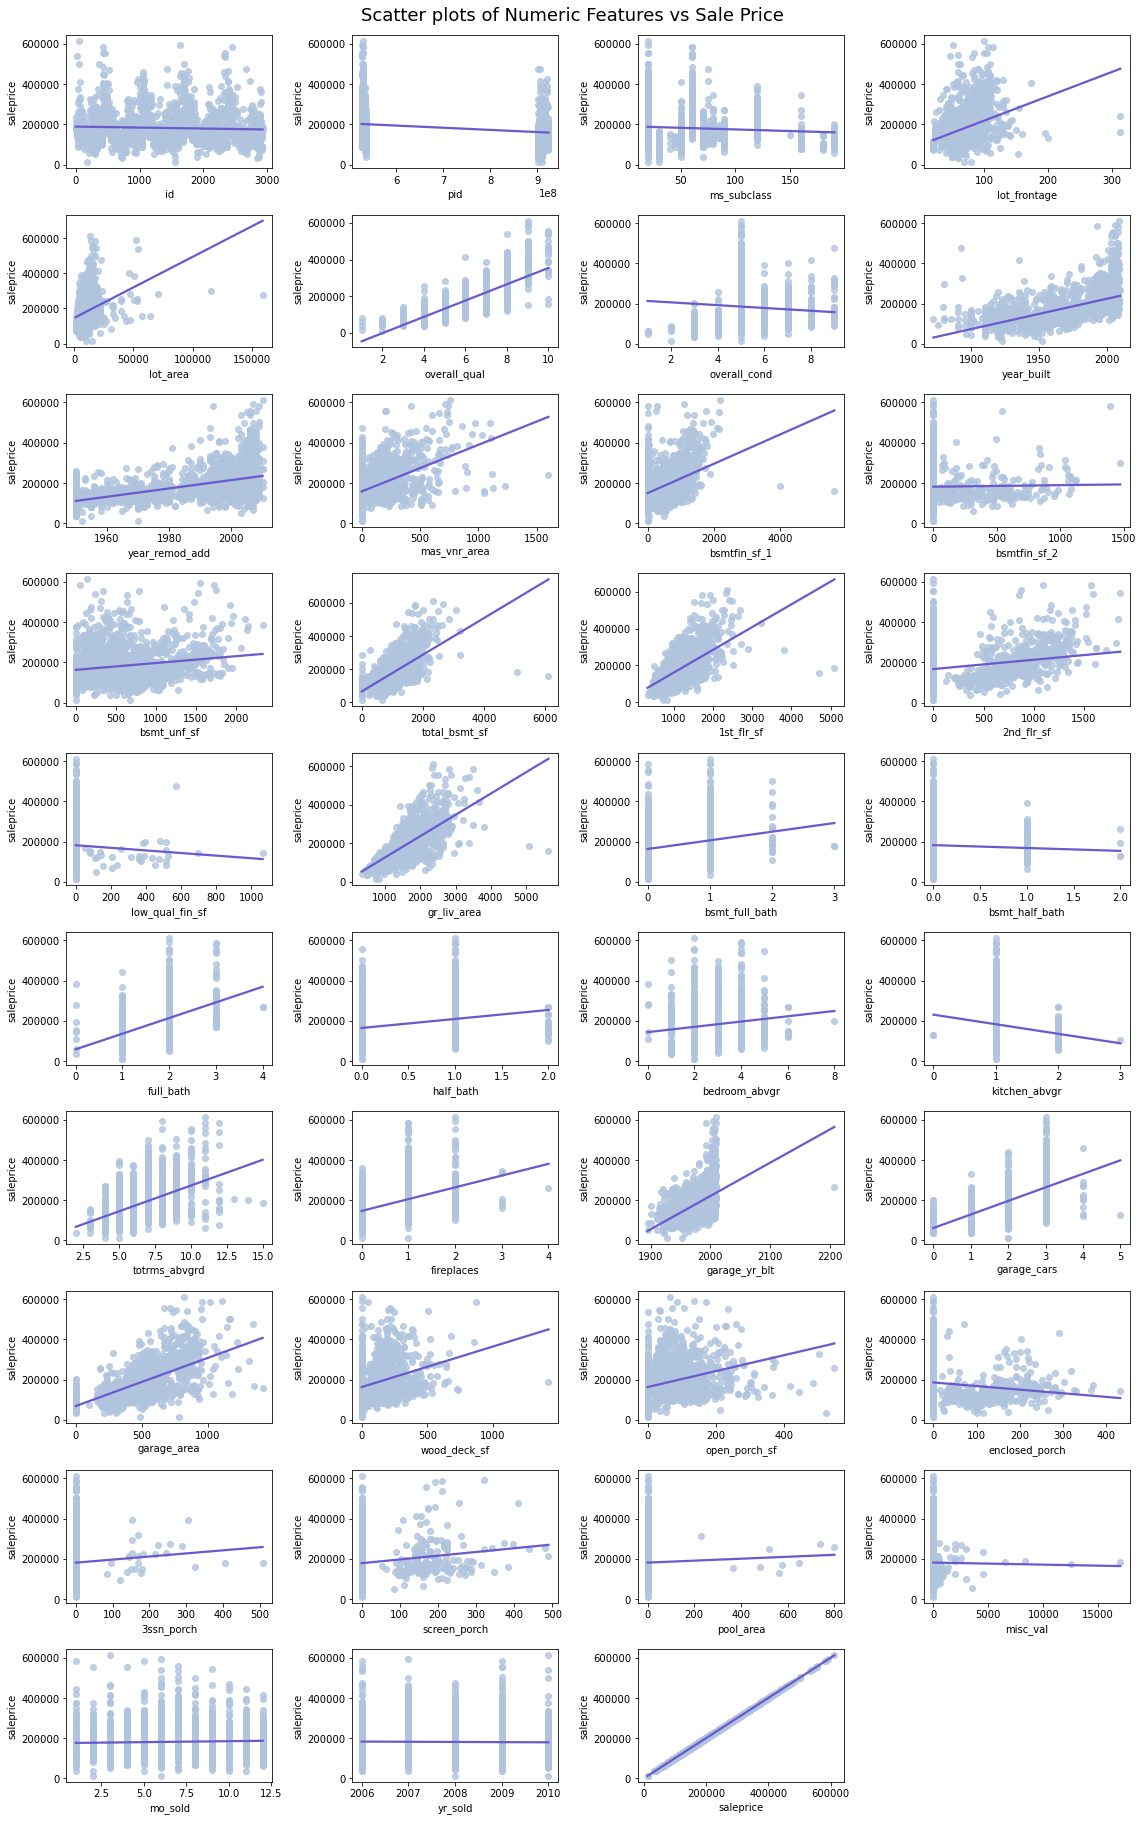

In [19]:
subplot_scatter(train, num_features, 'saleprice', 'Scatter plots of Numeric Features vs Sale Price')

Based on the scatter plot above:
1. Positive correlation can be observed between `saleprice` and some features. (eg. `overall_qual`, `totrms_abvgrd`, `fireplaces`, `garage_cars`, `garage_area`, etc).
2. While it is generally assumed that newly built/remodeled houses would have higher `saleprice`, it is found to have a weak positive correlation in the scatter plot above. (`year_built` & `year_remod_add`).
3. There is a weak negative correlation between `saleprice` and `overall_cond`. Which is unexpected as it is generally assumed that the better the condition of  a house, the higher its price would be.
4. There does not seem to be any correlation between `saleprice` and features such as `mo_sold` and `yr_sold`, which means that prices remained relatively constant over time.

In [20]:
# function for plotting historgrams of numeric features 

def subplot_hist(df, list_of_cols, figtitle): 
    nrows = int(np.ceil(len(list_of_cols)/4)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 4, figsize = (16, nrows*2.5)) 
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_cols):
        sns.histplot(data = df, x = column, ax = ax[i], color = 'lightsteelblue', line_kws = {'color': 'slateblue'} )
        plt.tight_layout()
        
    for j in range((nrows * 4) - len(list_of_cols)):
        ax[-j-1].set_visible(False) # hide unused plots
    
    plt.suptitle(figtitle, size = 18, y = 1.01)

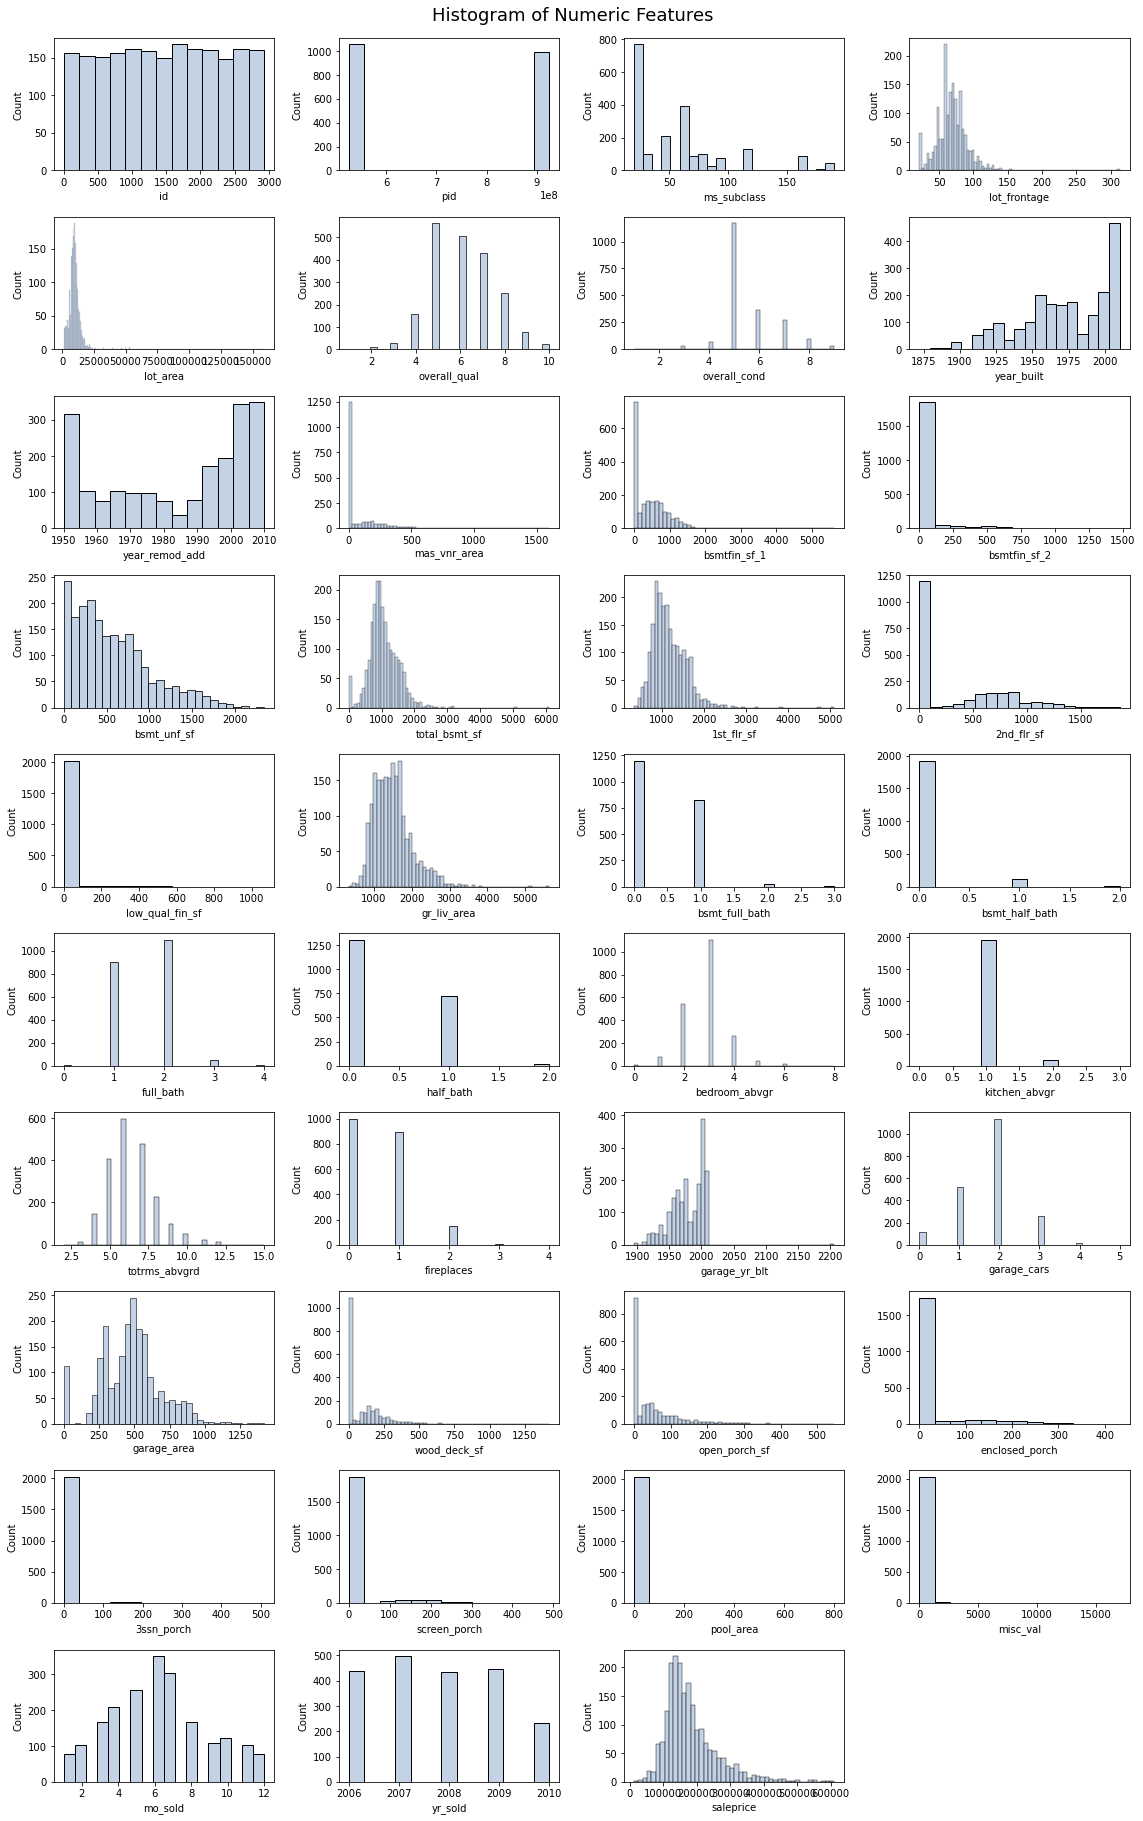

In [21]:
subplot_hist(train, num_features, 'Histogram of Numeric Features')

Based on the histograms above:
1. A right-skewed distribution can be observed for many features involving square feet as well as `saleprice`.
2. A left-skewed distribution can be observed for `year_built`.
3. A U-shaped distribution can be observed for `year_remod_add`.
4. Feasures such as `pool_area` and `misc_val` seem to have a low spread. Hence they may not be as effective in predicting `saleprice`. 

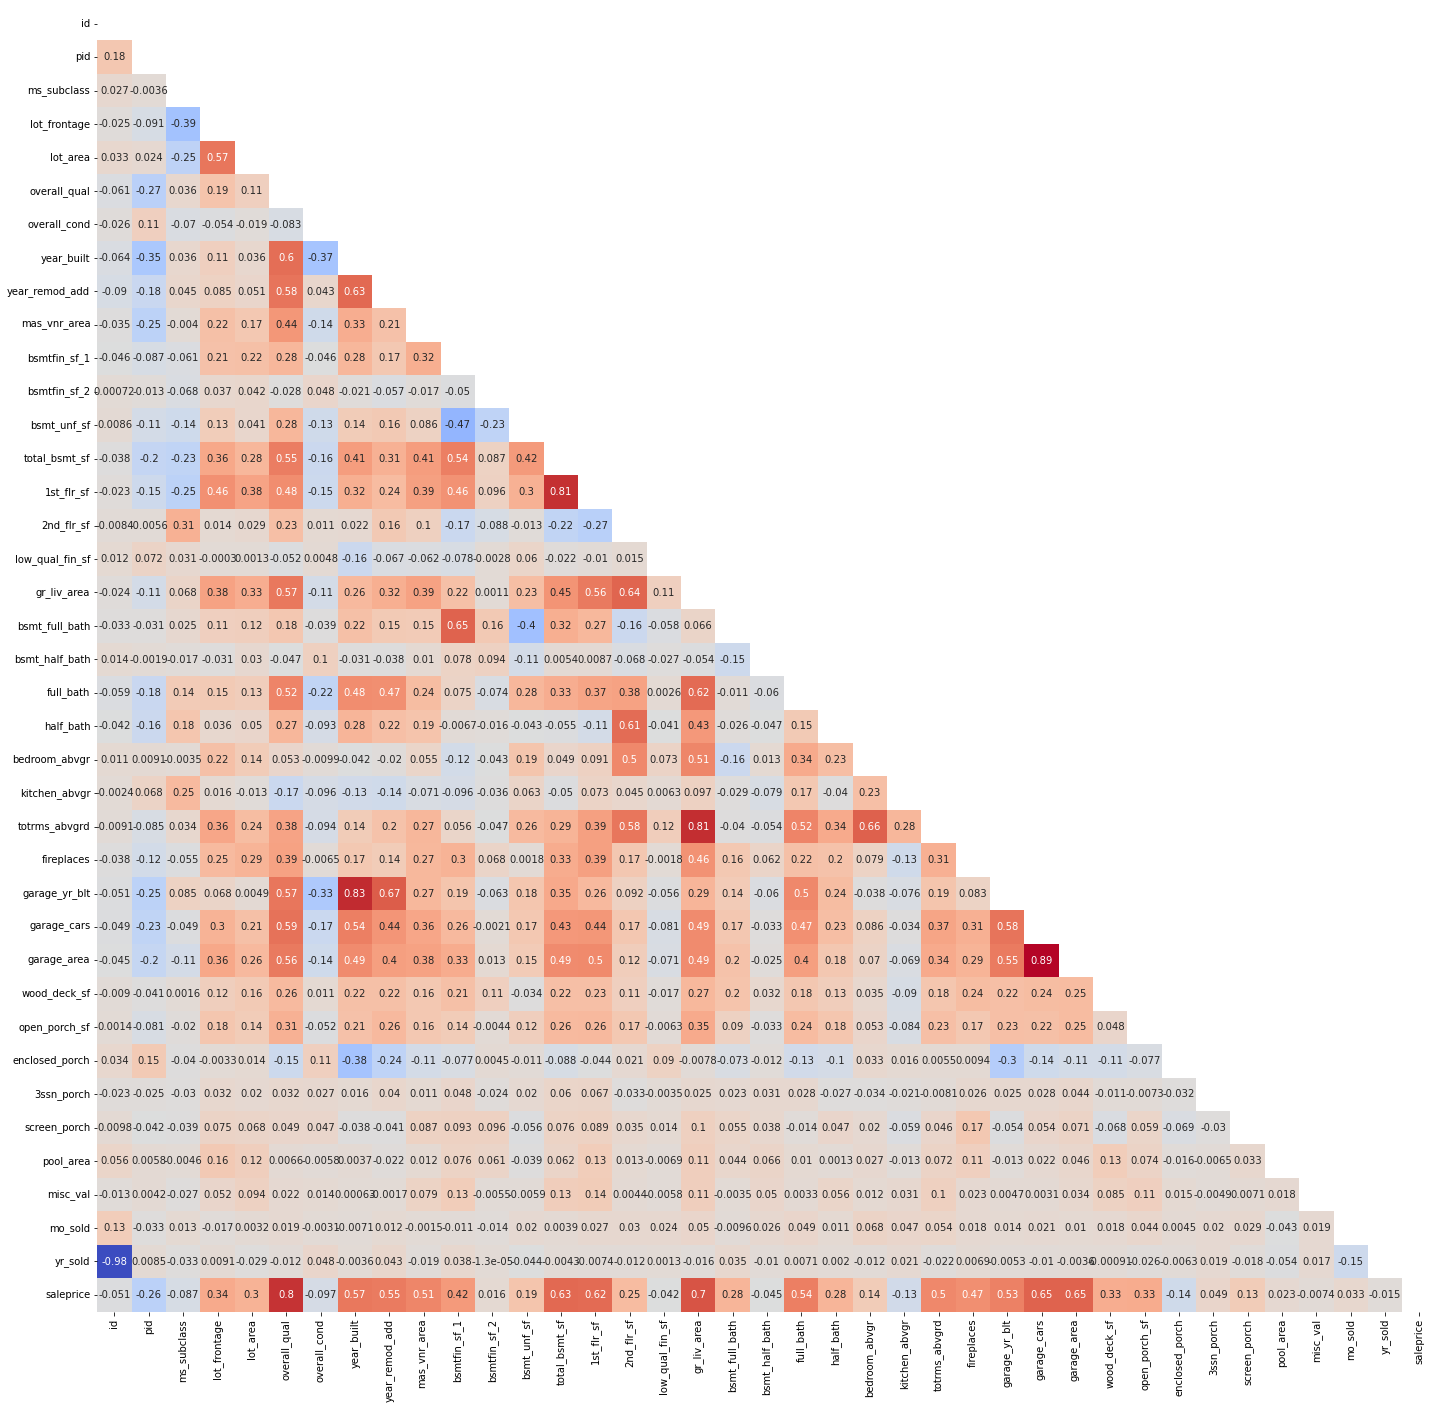

In [22]:
# Check correlation for all variables
plt.figure(figsize=(24, 24))
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), mask = mask, cmap='coolwarm', annot=True, cbar=False);

Based on the heatmap above, 
1. There are a few variables with multicollinearity, with a high coefficient of more than 0.8. 
    - `garage_area` and `garage_cars` have the highest coefficient of 0.89, which is expected as the larger the garage area is, the more car it should be able to contain. 
    - `year_blt` and `garage_yr_blt` have a coefficient of 0.83, as the year the garage was built would be highly dependent on when the house was built
    - `total_bsmt_sf` and `1st_flr_sf` have a coefficient of 0.81, as houses with a large basement area tend to have a larger 1<sup>st</sup> floor area as well. 
    - `gr_liv_area` and `totrms_abvgrd` have a coefficient of 0.81 too, where houses with larger above ground living area tends to have a higher total number of rooms above ground as well. 
    
One way to reduce such collinearity is to use only one of the two features or to create a new feature that emcompasses both features.


2. `overall_qual` and `saleprice` is highly corelated with a coefficient of 0.8. 

## Conclusion

In order to create a feasible linear regression model that can accurately predict the sale price of houses in Ames, we will need to work on both reducing multicollinearity and the skewness of certain features. This can be achieved through data cleaning, feature engineering/selection as well as regularisation.